In [1]:
import numpy as np
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['figure.dpi'] = 300
plt.style.use('seaborn-whitegrid')


In [2]:
df = pd.read_csv('data/wine.csv')

df['qual_cat'] = pd.cut(df['quality'], bins = [0, 5, 6, 9],
       labels = ['low', 'medium', 'high'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         6497 non-null   float64 
 1   volatile acidity      6497 non-null   float64 
 2   citric acid           6497 non-null   float64 
 3   residual sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free sulfur dioxide   6497 non-null   float64 
 6   total sulfur dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   int64   
 12  type                  6497 non-null   object  
 13  qual_cat              6497 non-null   category
dtypes: category(1), float64(11), int64(1), object(1)
memory 

In [3]:
df['qual_cat'].value_counts()

medium    2836
low       2384
high      1277
Name: qual_cat, dtype: int64

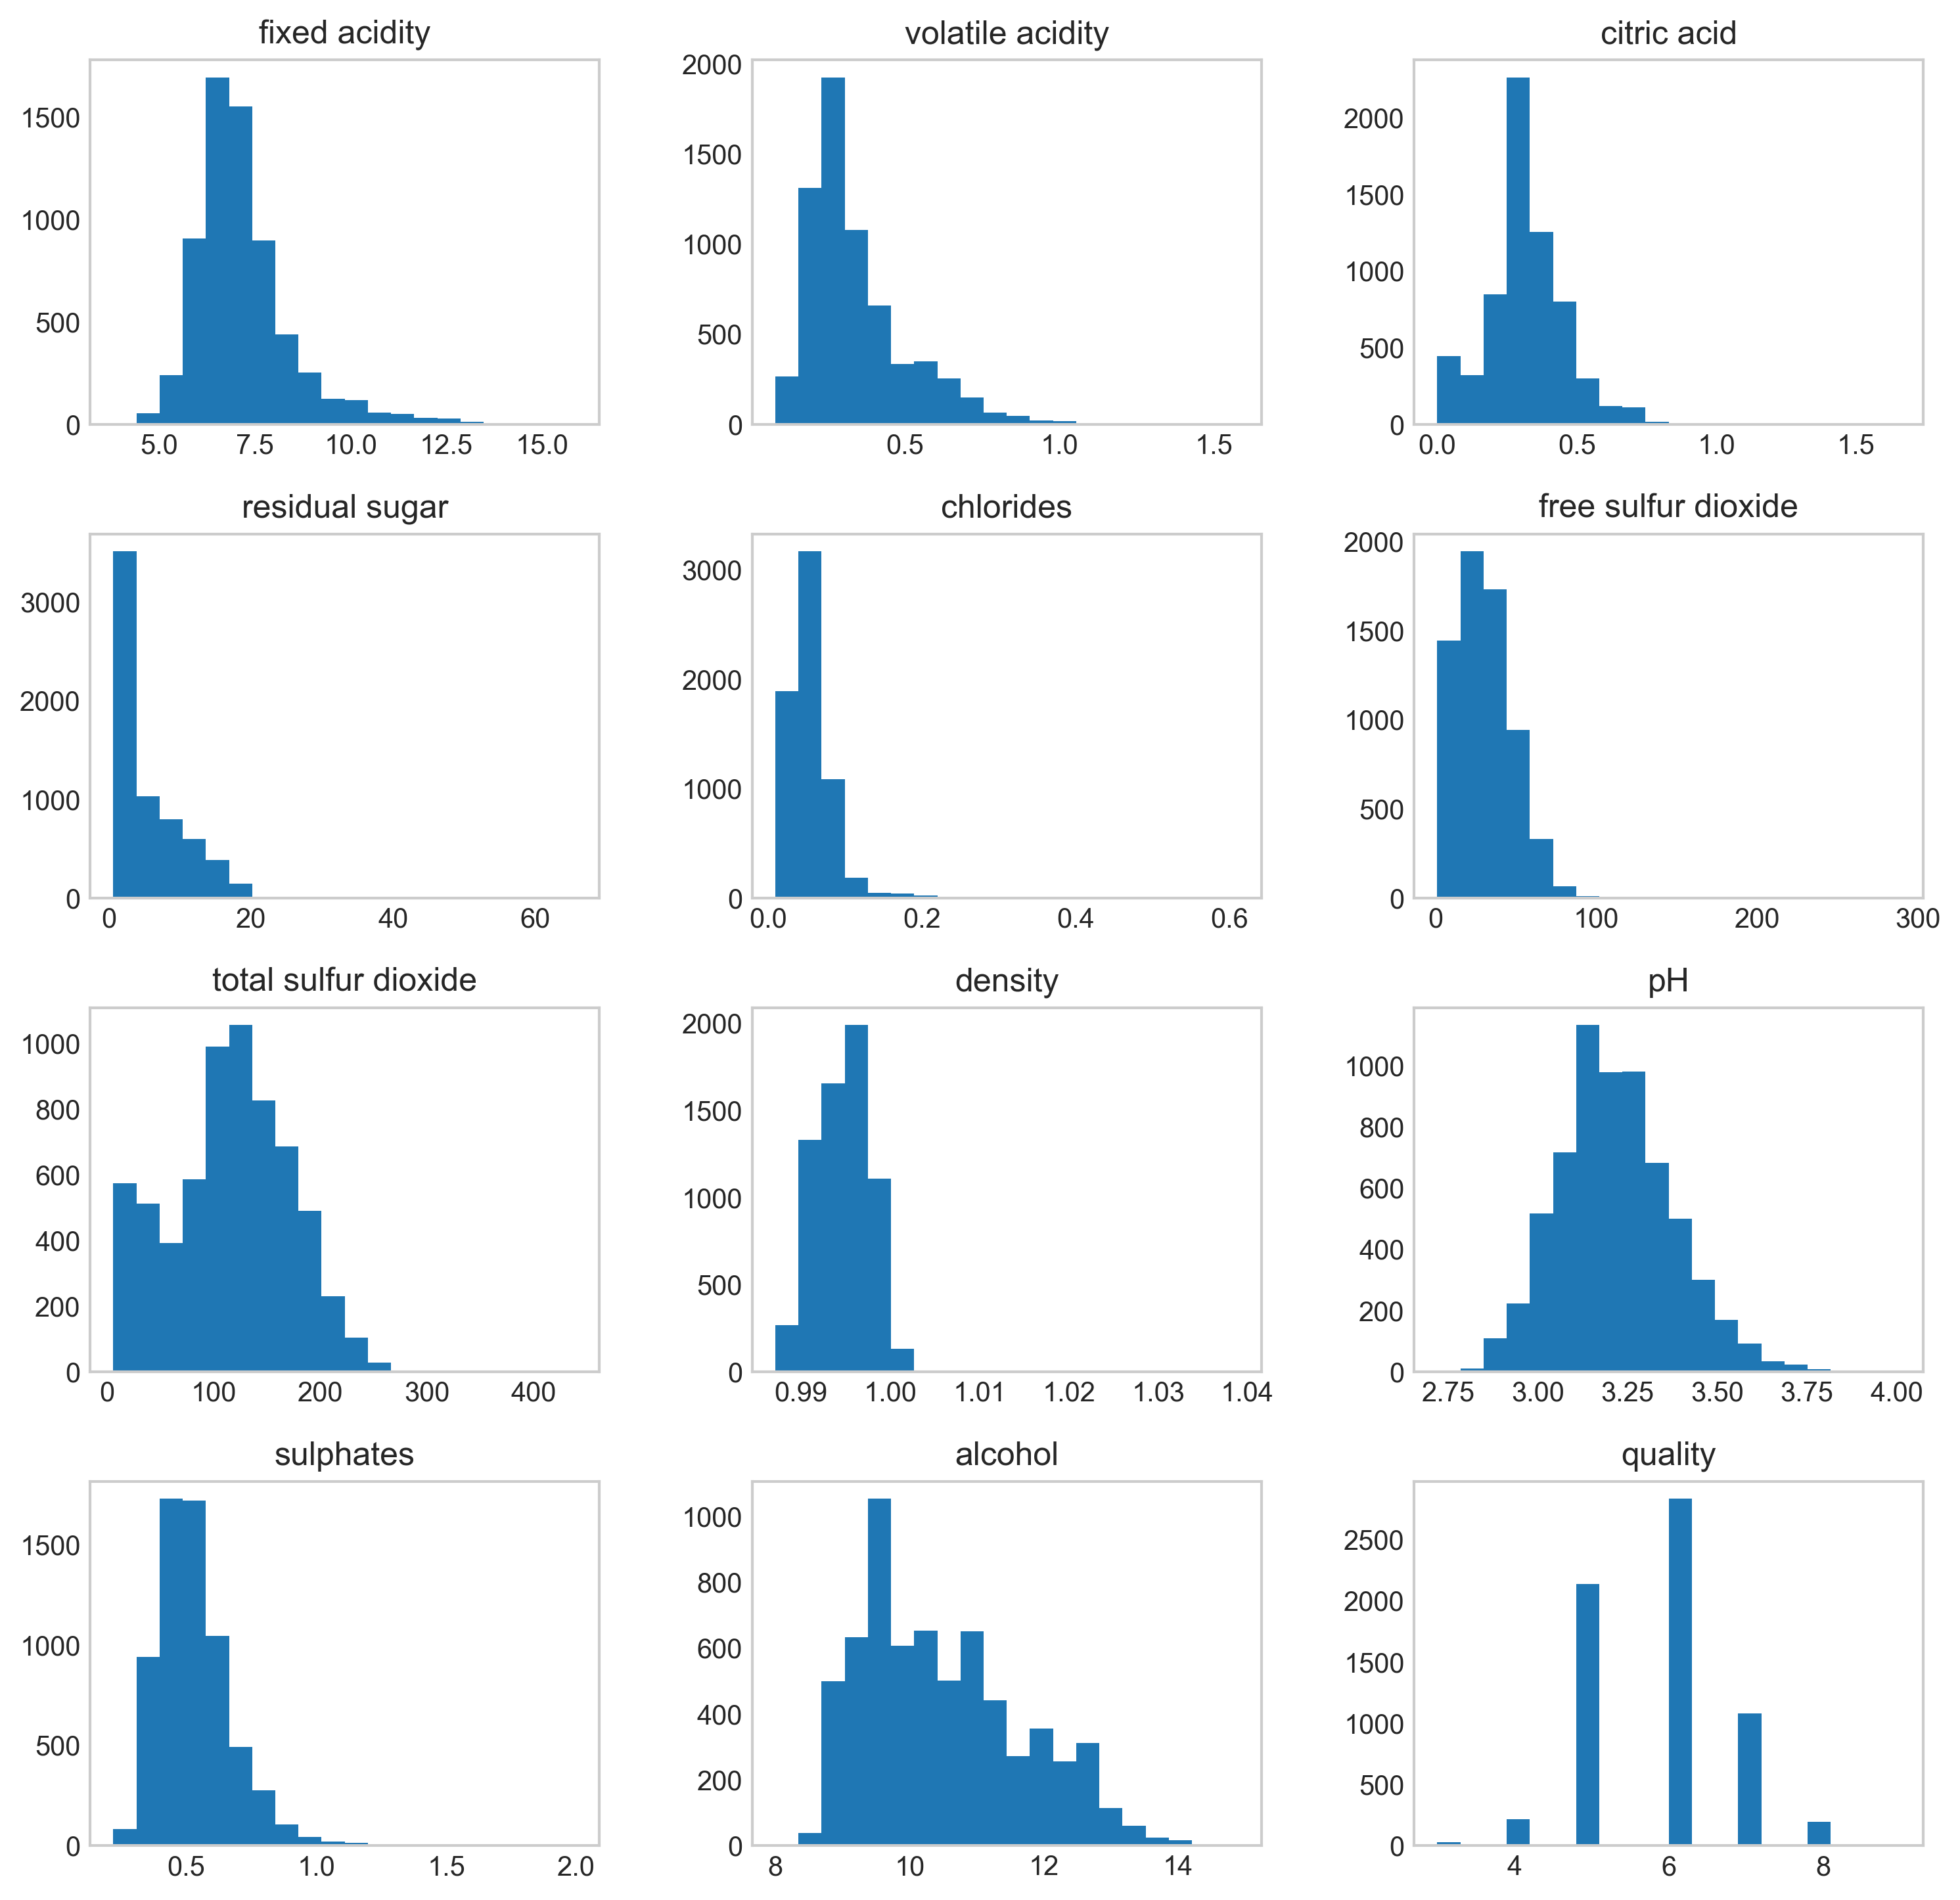

In [51]:
df.hist(figsize = (12,12), grid = False, bins = 20)

plt.show()

In [104]:
dv = 'pH'
group = 'qual_cat'

df.groupby(group).median()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
qual_cat,,,,,,,,,,,,
low,7.1,0.3375,0.295,2.9,0.052,26.0,124.0,0.99600,3.20,0.50,9.6,5.0
medium,6.9,0.2700,0.310,3.1,0.046,29.0,117.0,0.99470,3.21,0.51,10.5,6.0
high,6.9,0.2700,0.320,2.9,0.039,31.0,114.0,0.99228,3.22,0.51,11.5,7.0


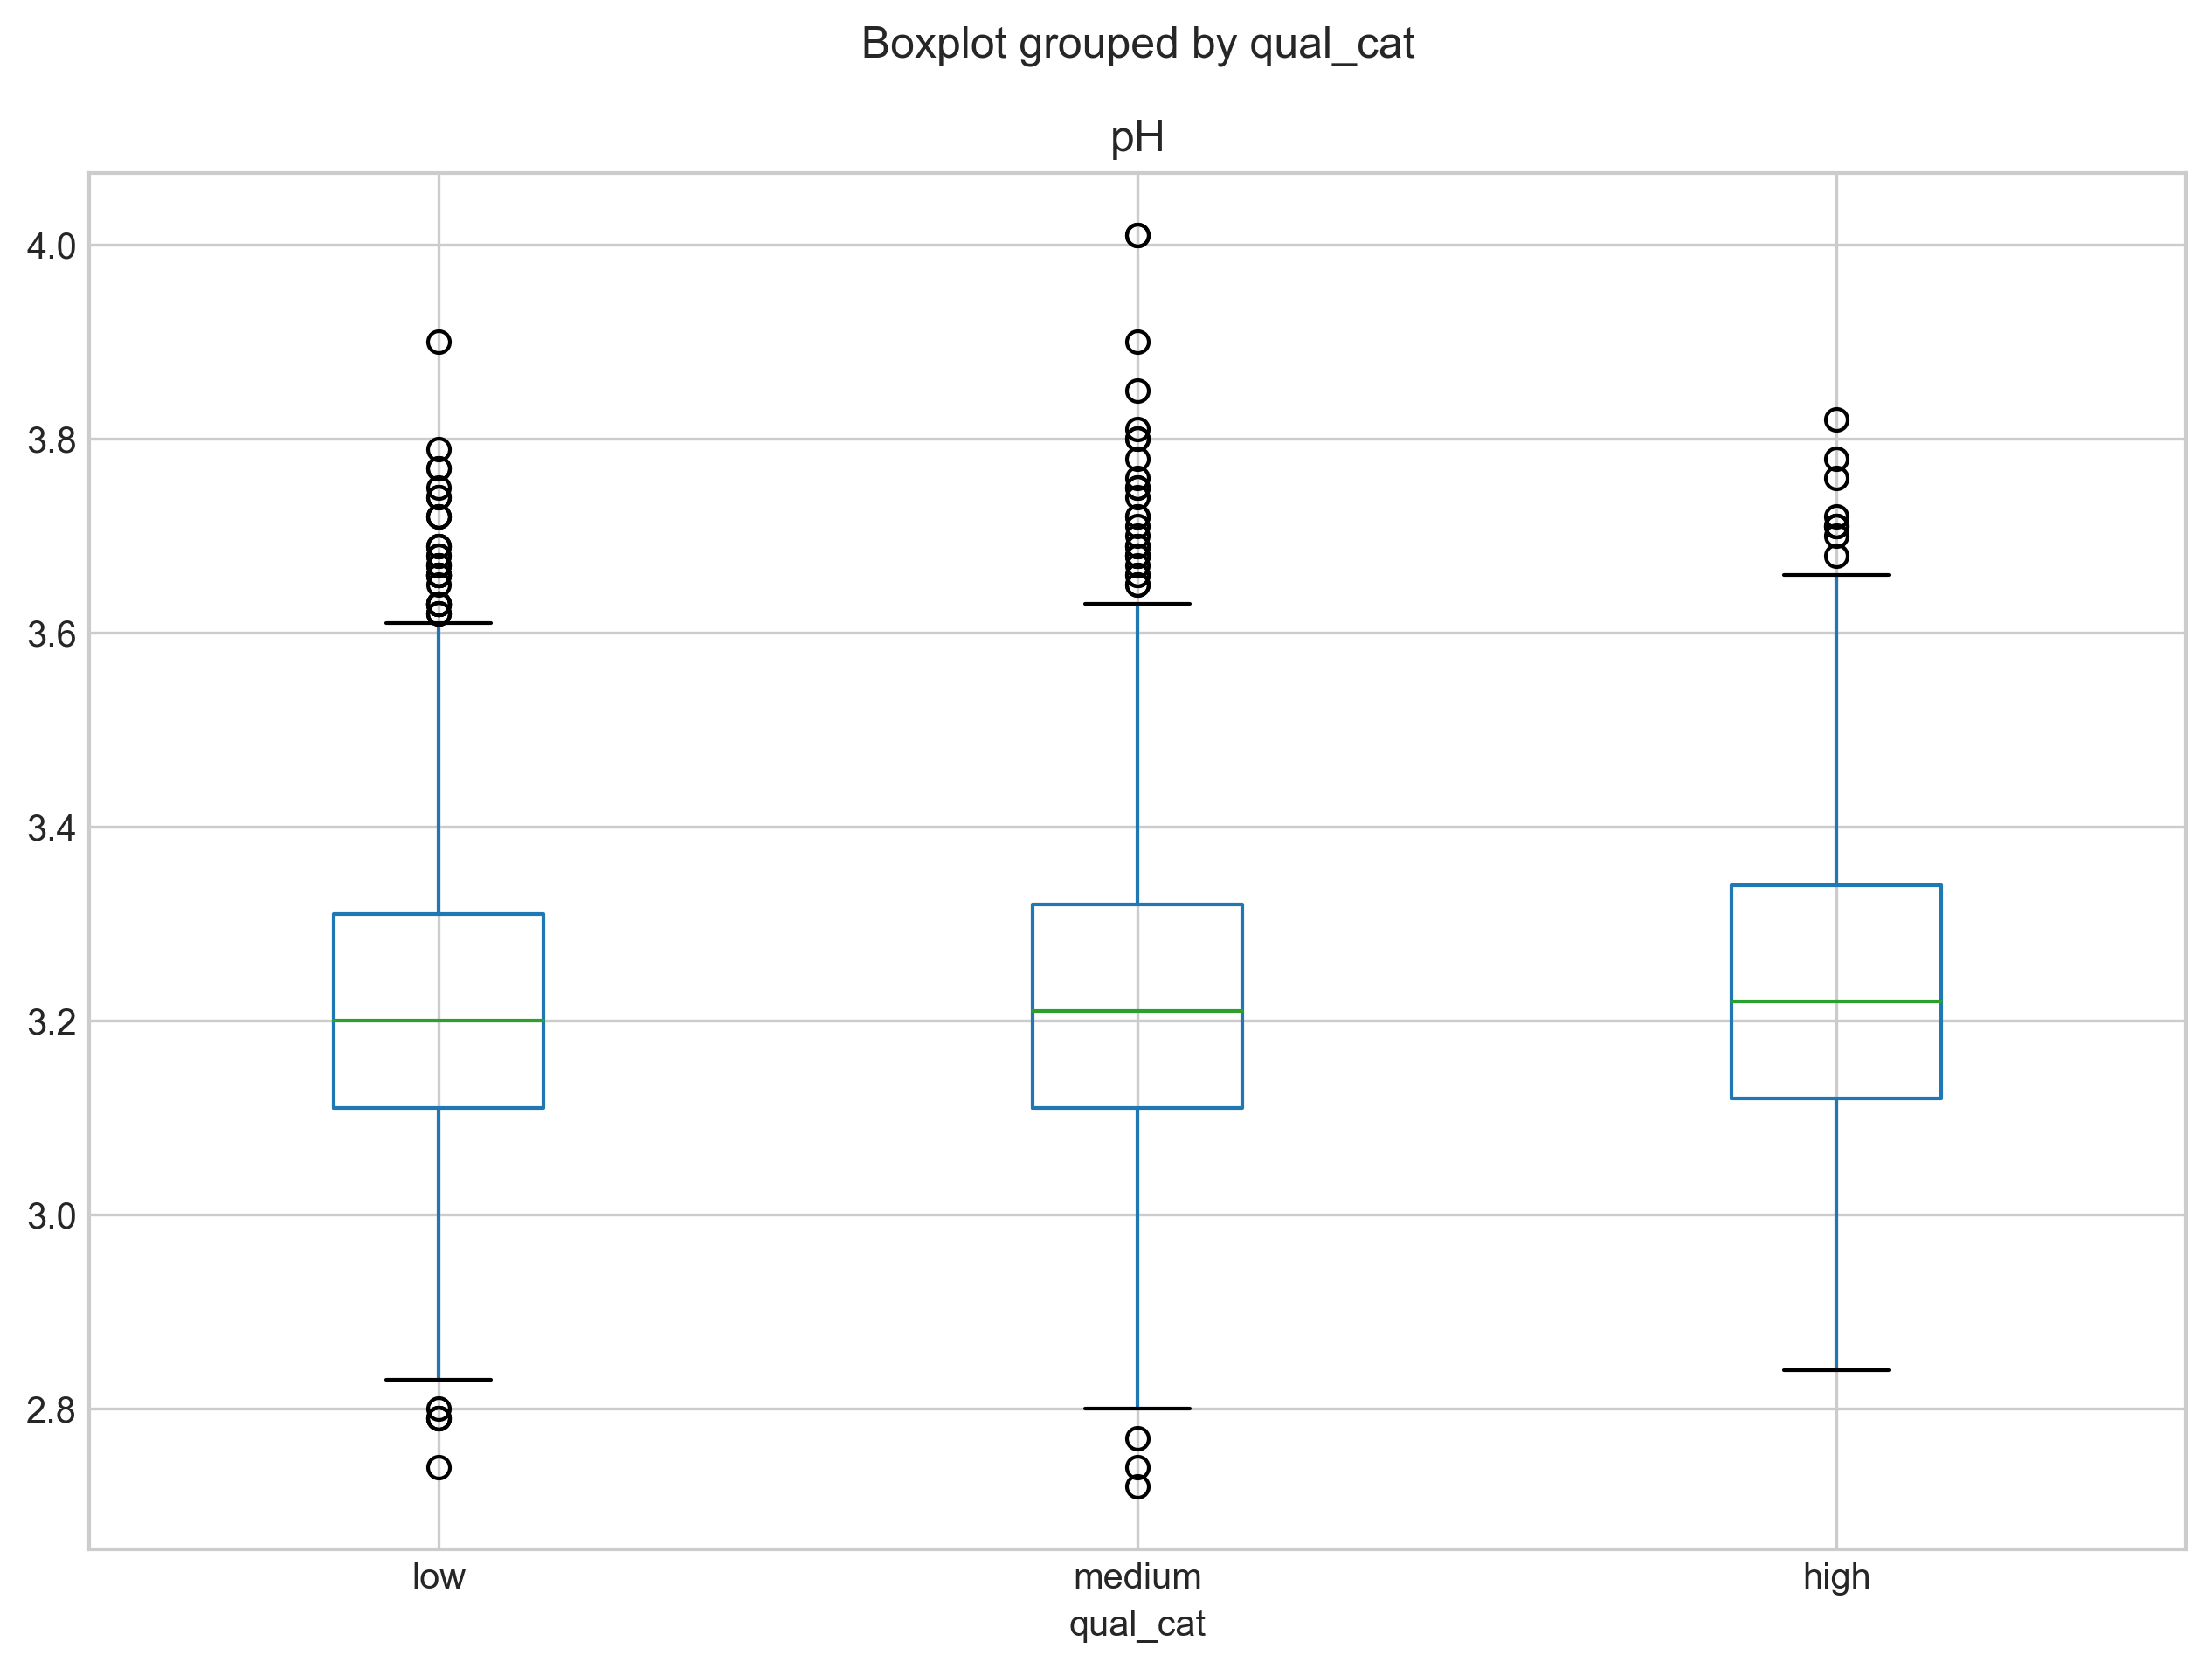

In [105]:
df.boxplot(dv, by = group, figsize = (10,7), grid = True)
plt.show()

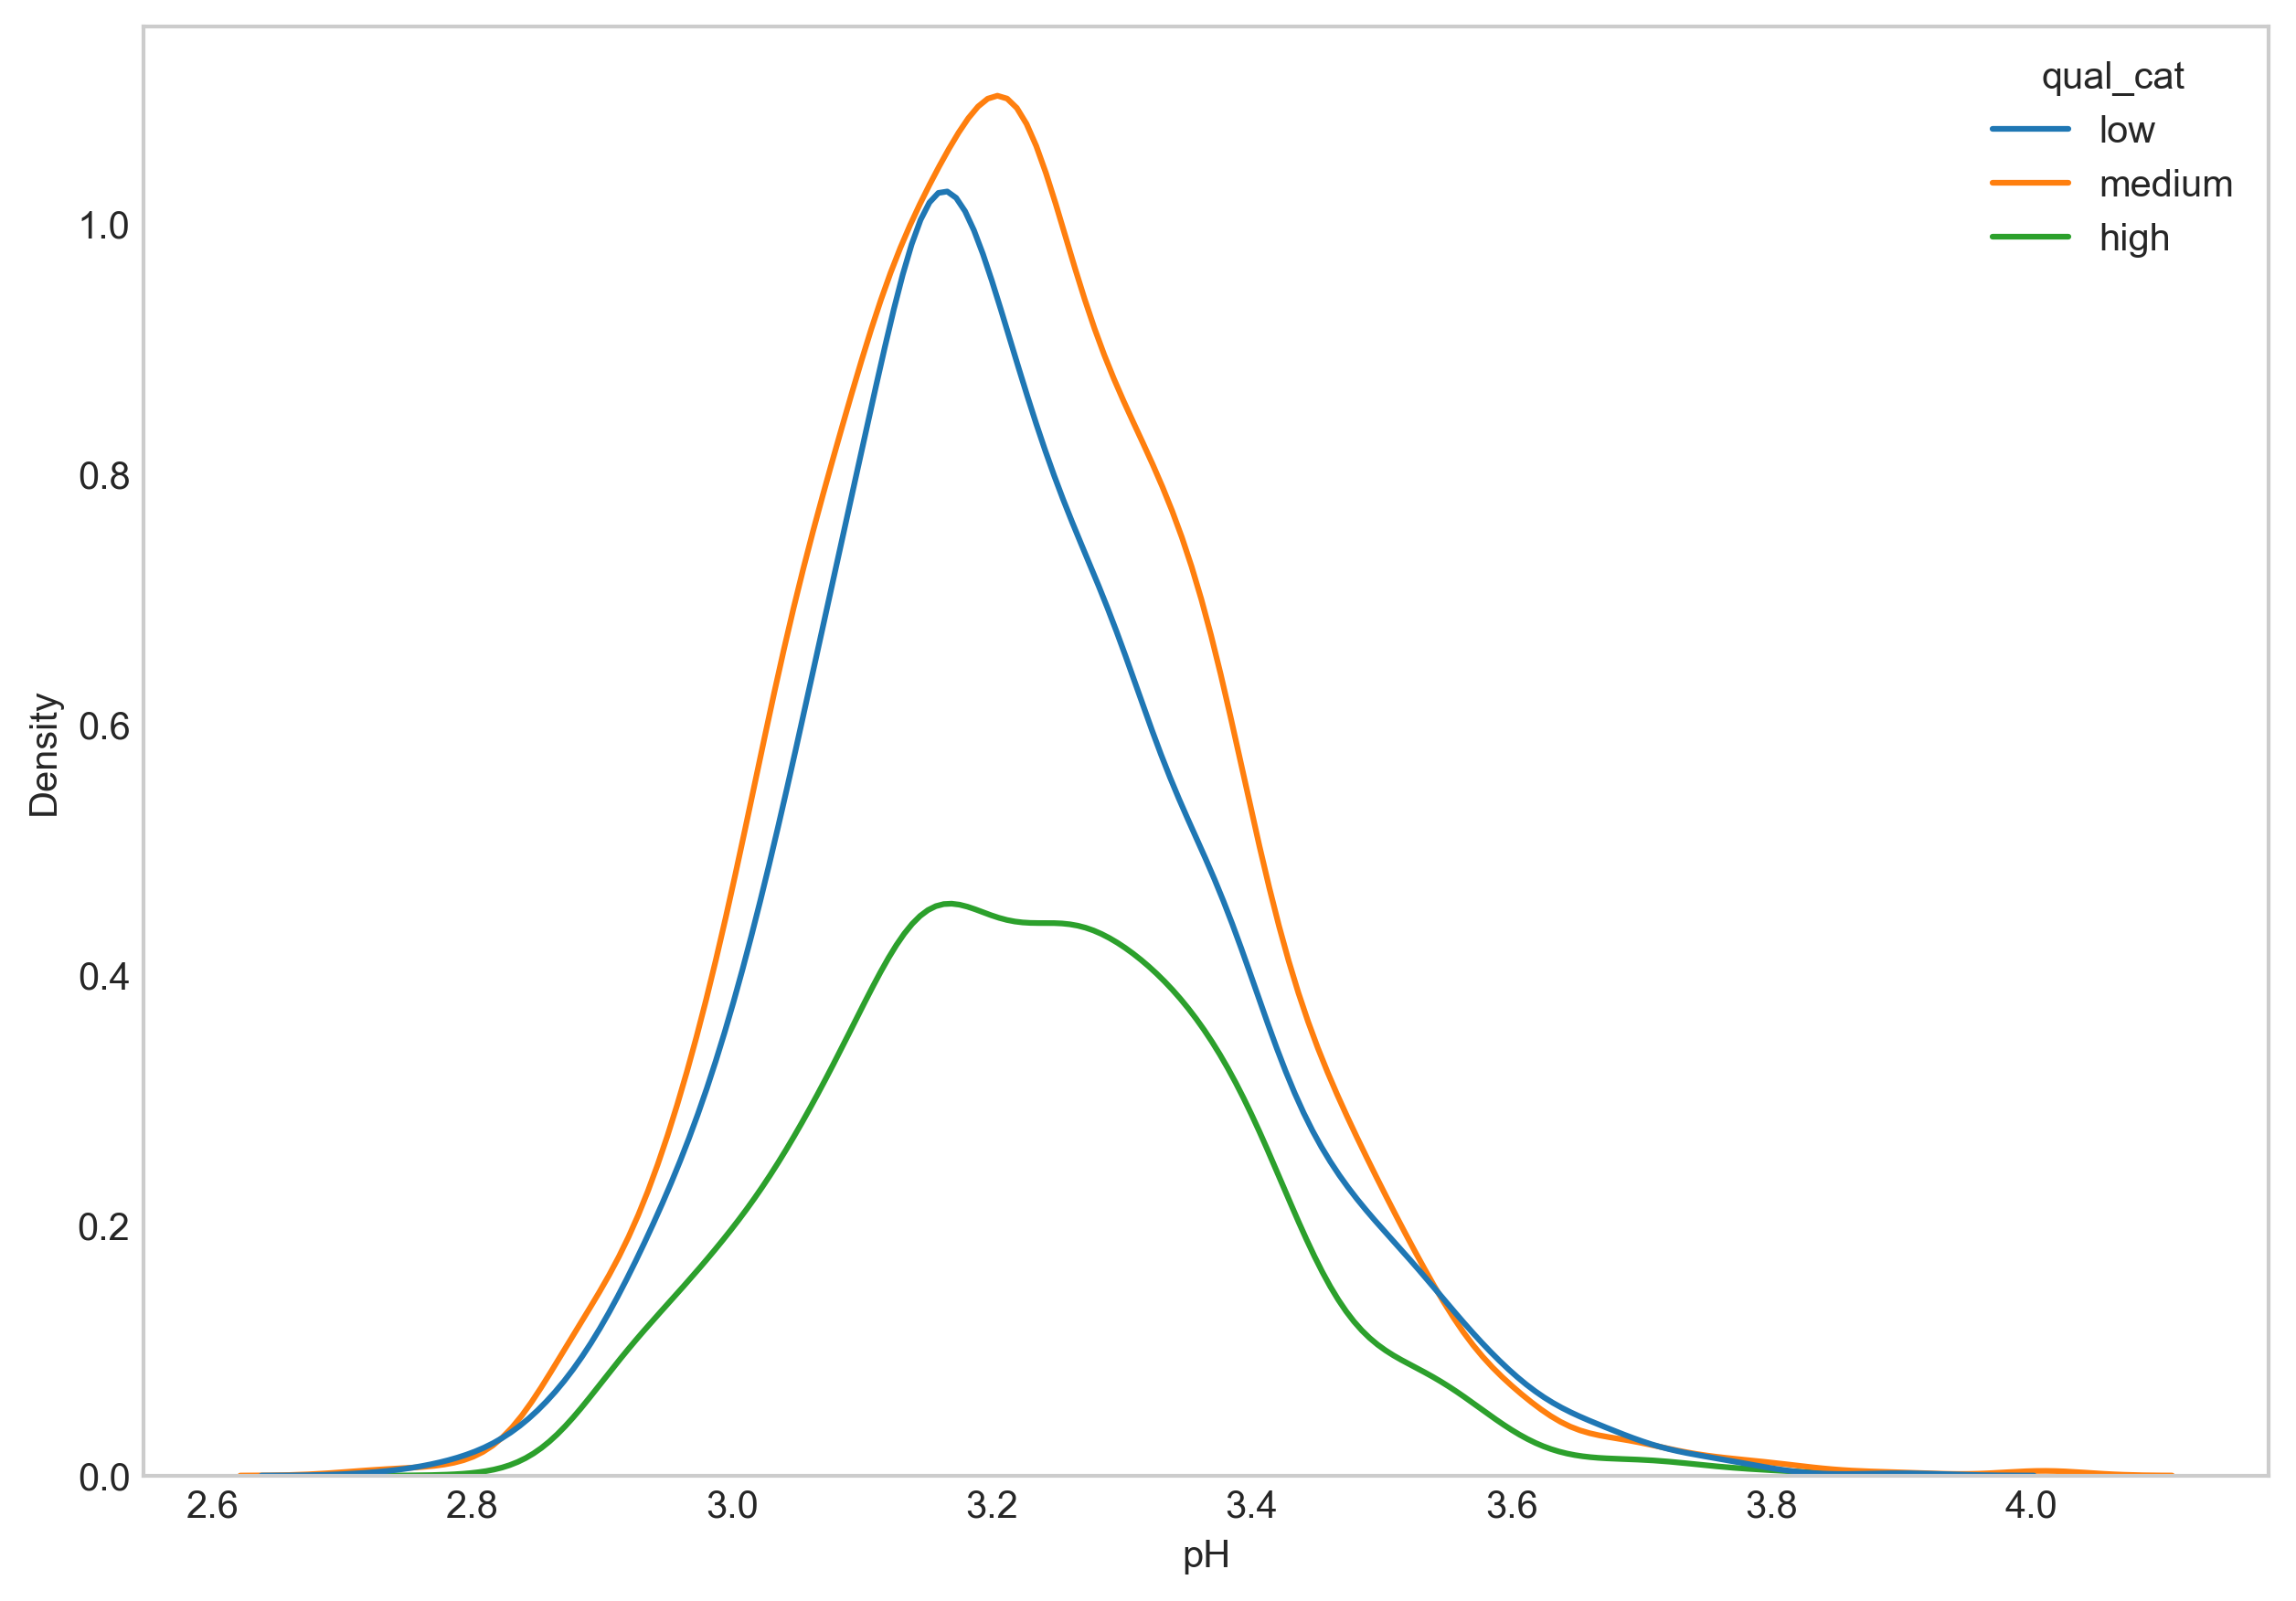

,W,pval,normal
low,92.630102,0.000000,False
medium,114.015641,0.000000,False
high,12.967021,0.001528,False


In [116]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.grid(False)

sns.kdeplot(data = df, x = dv, hue = group, ax = ax)
plt.show()

pg.normality(df, dv = dv, group = group, method = 'jarque_bera')

In [118]:
pg.kruskal(df, dv = dv, between = group)

,Source,ddof1,H,p-unc
Kruskal,qual_cat,2,9.082055,0.010662


In [119]:
pg.pairwise_tests(df, dv = dv, between = group, parametric = False)

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,hedges
0,qual_cat,low,medium,False,False,3313312.5,two-sided,0.215253,-0.019879
1,qual_cat,low,high,False,False,1430977.5,two-sided,0.002763,-0.081762
2,qual_cat,medium,high,False,False,1736692.5,two-sided,0.035452,-0.061861
